### TD IA Keras
Auteurs : Sofian Antri et Pourtier Jacques
----------------

Nous devions concevoir un réseau de neurones pour reconnaitre des images provenant d'une base de donnée CIFAR10.
Cette base de donnée contient 60,000 images de 10 classes différentes et de tailles 32x32 pixels.
Pour commencer, nous avons réutiliser notre réseau de neurones fais en cours, sur la base de donnée mnist.

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_class = 10

y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

Using TensorFlow backend.
/net/cremi/jpourtier/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/net/cremi/jpourtier/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/net/cremi/jpourtier/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/net/cremi/jpourtier/.local/lib/python3.5

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Pour cette première version: nous avons donc tester notre réseau de neurones fait en td

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3,activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split = 0.2,epochs=50, batch_size=150)
score = model.evaluate(x_test, y_test, batch_size=150)



Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 34s 854us/step - loss: 1.5683 - accuracy: 0.4385 - val_loss: 1.3151 - val_accuracy: 0.5393
Epoch 2/50
40000/40000 [==============================] - 34s 845us/step - loss: 1.2234 - accuracy: 0.5709 - val_loss: 1.1953 - val_accuracy: 0.5857
Epoch 3/50
40000/40000 [==============================] - 34s 846us/step - loss: 1.0839 - accuracy: 0.6227 - val_loss: 1.0780 - val_accuracy: 0.6342
Epoch 4/50
40000/40000 [==============================] - 34s 849us/step - loss: 0.9795 - accuracy: 0.6601 - val_loss: 1.0295 - val_accuracy: 0.6512
Epoch 5/50
40000/40000 [==============================] - 34s 852us/step - loss: 0.8906 - accuracy: 0.6914 - val_loss: 1.0110 - val_accuracy: 0.6546
Epoch 6/50
40000/40000 [==============================] - 34s 855us/step - loss: 0.8152 - accuracy: 0.7205 - val_loss: 0.9641 - val_accuracy: 0.6741
Epoch 7/50
40000/40000 [==============================

score [3.099532119035721, 0.6646999716758728]
Neural network accuracy: 66.47%
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


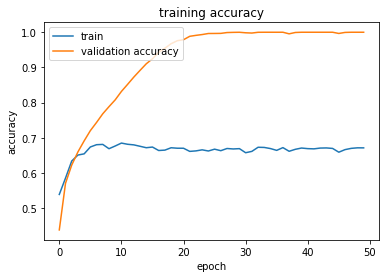

In [3]:
print("score",score)
print("Neural network accuracy: %.2f%%" % (score[1]*100))

model.predict(x_test[:4])

print(y_test[:4])

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation accuracy'], loc='upper left')
plt.show()

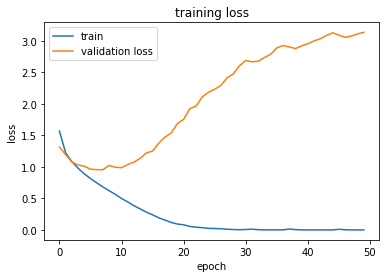

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation loss'], loc='upper left')
plt.show()

Ensuites, nous avons ajouter plusieurs couches de convolution/maxpooling pour permettre de récupérer plus de données précise des images.Ces 3 couches donnent des résultats raisonnable. Rajouter de nouvelle couche pourrait être trop précis et récupérer des informations inutiles et donc baisser notre accuracy.
"padding="same"" nous permet de garder la même taille que l'entrée à la sortie.

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3,activation='relu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, kernel_size=3,activation='relu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128, kernel_size=3,activation='relu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(128, kernel_size=3,activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split = 0.2,epochs=100, batch_size=150)
score = model.evaluate(x_test, y_test, batch_size=150)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 47s 1ms/step - loss: 1.8003 - accuracy: 0.3356 - val_loss: 1.5212 - val_accuracy: 0.4405
Epoch 2/100
40000/40000 [==============================] - 47s 1ms/step - loss: 1.4431 - accuracy: 0.4737 - val_loss: 1.3245 - val_accuracy: 0.5204
Epoch 3/100
40000/40000 [==============================] - 47s 1ms/step - loss: 1.2332 - accuracy: 0.5559 - val_loss: 1.1267 - val_accuracy: 0.5983
Epoch 4/100
40000/40000 [==============================] - 47s 1ms/step - loss: 1.0635 - accuracy: 0.6241 - val_loss: 1.0541 - val_accuracy: 0.6217
Epoch 5/100
40000/40000 [==============================] - 47s 1ms/step - loss: 0.9653 - accuracy: 0.6578 - val_loss: 0.9596 - val_accuracy: 0.6558
Epoch 6/100
40000/40000 [==============================] - 47s 1ms/step - loss: 0.8719 - accuracy: 0.6932 - val_loss: 0.9024 - val_accuracy: 0.6834
Epoch 7/100
40000/40000 [==============================] - 47s

score [2.5591241097450257, 0.7651000022888184]
Neural network accuracy: 76.51%
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


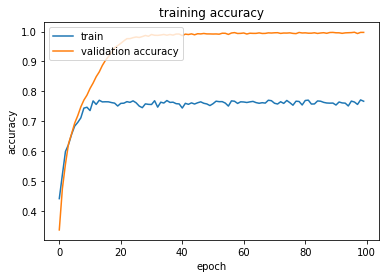

In [6]:
print("score",score)
print("Neural network accuracy: %.2f%%" % (score[1]*100))

model.predict(x_test[:4])

print(y_test[:4])

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation accuracy'], loc='upper left')
plt.show()

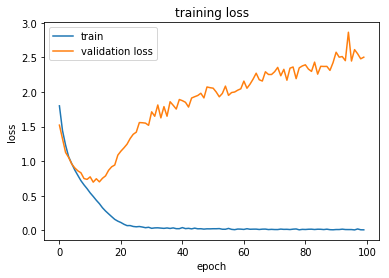

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation loss'], loc='upper left')
plt.show()

Enfin, Nous avons ajouter des Dropout pour empêcher l'overfitting.
Pour les fonctions d'activations, nous en avons testé une grande majorité et nous avons conclus que la fonction elu était la plus performante.

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='elu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(32, kernel_size=3, activation='elu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=3, activation='elu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(64, kernel_size=3, activation='elu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation='elu', input_shape=(32,32,3),padding="same"))
model.add(Conv2D(128, kernel_size=3, activation='elu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

Nous avons augmenté le nombre d'epochs pour permettre d'atteindre le meilleur pourcentage de la convergence.

In [5]:
history = model.fit(x_train, y_train, validation_split = 0.2,epochs=150, batch_size=150)
score = model.evaluate(x_test, y_test, batch_size=150)


Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 46s 1ms/step - loss: 1.6549 - accuracy: 0.3952 - val_loss: 1.4125 - val_accuracy: 0.5019
Epoch 2/150
40000/40000 [==============================] - 47s 1ms/step - loss: 1.2847 - accuracy: 0.5396 - val_loss: 1.1015 - val_accuracy: 0.6139
Epoch 3/150
40000/40000 [==============================] - 47s 1ms/step - loss: 1.1334 - accuracy: 0.5993 - val_loss: 1.0088 - val_accuracy: 0.6386
Epoch 4/150
40000/40000 [==============================] - 46s 1ms/step - loss: 1.0457 - accuracy: 0.6320 - val_loss: 0.9490 - val_accuracy: 0.6614
Epoch 5/150
40000/40000 [==============================] - 46s 1ms/step - loss: 0.9759 - accuracy: 0.6567 - val_loss: 0.8398 - val_accuracy: 0.7041
Epoch 6/150
40000/40000 [==============================] - 47s 1ms/step - loss: 0.9293 - accuracy: 0.6743 - val_loss: 0.8313 - val_accuracy: 0.7075
Epoch 7/150
40000/40000 [==============================] - 47

Nous aurions pue utiliser la fonction ImageDataGenerator pour générer une base de donnée de copies d'images d'entrainement avec des modifications aléatoires mais le temps d'exécution du réseau de neurones est beaucoup trop long.

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for feature-wise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test, y_test))
#     history = model.fit(x_train, y_train, validation_split = 0.2,epochs=150 , batch_size=150)

score [0.6086892546713352, 0.832099974155426]
Neural network accuracy: 83.21%
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


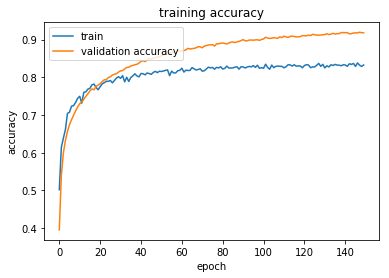

In [6]:
print("score",score)
print("Neural network accuracy: %.2f%%" % (score[1]*100))

model.predict(x_test[:4])

print(y_test[:4])

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation accuracy'], loc='upper left')
plt.show()

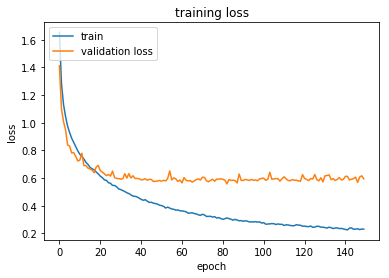

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation loss'], loc='upper left')
plt.show()

Ici, on sauvegarde notre sauvegarde notre model final dans fichier JSON

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Site pour copier coller
https://arxiv.org/abs/1511.07289
https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/?completed=/loading-custom-data-deep-learning-python-tensorflow-keras/
https://keras.io/examples/cifar10_cnn/